### Load libraries, packages

In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import numpy as np
from os.path import join
import nltk
nltk.download(['stopwords', 'vader_lexicon','punkt'])
import seaborn as sns
from nltk.corpus import movie_reviews, stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from statistics import mean
from collections import Counter
from textblob import TextBlob
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /Volumes/Users/ly_k1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Volumes/Users/ly_k1/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Volumes/Users/ly_k1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Load metadata and text files

In [7]:
metadata = pd.read_csv('metadata.csv')
metadata = metadata.drop(['Unnamed: 0'], axis = 1)
#metadata

In [8]:
file_names = list(metadata['file_name'])                     #get all file names
file_paths = [join('scripts', file) for file in file_names]  #get all file paths

all_txt = []
for file in file_paths:
    f = open(file,'r')
    txt = f.read()
    all_txt.append(txt)
    f.close()

## I. Extract Sentiments

### Load labeled data for validation purpose

In [7]:
metadata_labeled_30 = pd.read_csv('metadata_labeled_30.csv')

file_names = list(metadata_labeled_30['file_name'])
file_paths = [join('scripts', file) for file in file_names]

all_txt_labeled_30 = []
for file in file_paths:
    f = open(file,'r')
    txt = f.read()
    all_txt_labeled_30.append(txt)
    f.close()

### Extract sentiments using VADER and TextBlob on the document level

In [11]:
def get_polarity(txt):
    '''
    Given a document calculates the polarity score using TextBlob
    '''
    return TextBlob(txt).sentiment.polarity

In [12]:
whole_txt_scores_vader = []
whole_txt_scores_tb = []
for txt in all_txt_labeled_30:
    whole_txt_scores_vader.append(sia.polarity_scores(txt))
    whole_txt_scores_tb.append(get_polarity(txt))

In [13]:
whole_txt_scores_vader_df = pd.DataFrame(whole_txt_scores_vader)
whole_txt_scores_vader_df['title'] = metadata_labeled_30['title']
whole_txt_scores_vader_df['label'] = metadata_labeled_30['label']
whole_txt_scores_vader_df

,neg,neu,pos,compound,title,label
0,0.079,0.820,0.101,1.0000,Taxi Driver,neg
1,0.087,0.792,0.120,1.0000,Aladdin,pos
2,0.073,0.871,0.056,-0.9999,Mute Witness,neg
3,0.106,0.819,0.075,-1.0000,Se7en,neg
4,0.072,0.839,0.089,0.9999,Toy Story,pos
5,0.079,0.805,0.116,1.0000,Anastasia,pos
6,0.084,0.814,0.102,1.0000,Titanic,neg
7,0.125,0.787,0.088,-1.0000,American History X,neg
8,0.083,0.766,0.151,1.0000,Shrek,pos
9,0.124,0.764,0.112,-0.9999,House of 1000 Corpses,neg


In [14]:
whole_txt_scores_tb_df = pd.DataFrame(whole_txt_scores_tb)
whole_txt_scores_tb_df['title'] = metadata_labeled_30['title']
whole_txt_scores_tb_df['label'] = metadata_labeled_30['label']
whole_txt_scores_tb_df

,0,title,label
0,0.061937,Taxi Driver,neg
1,0.035073,Aladdin,pos
2,-0.007321,Mute Witness,neg
3,0.001272,Se7en,neg
4,0.046479,Toy Story,pos
5,0.042688,Anastasia,pos
6,0.140535,Titanic,neg
7,-0.036993,American History X,neg
8,0.125021,Shrek,pos
9,-0.007188,House of 1000 Corpses,neg


In [22]:
whole_txt_scores_vader_df.to_csv('whole_txt_scores_vader.csv')
whole_txt_scores_tb_df.to_csv('whole_txt_scores_tb.csv')

### Extract sentiments using VADER and TextBlob on the sentence level and get the average scores

In [18]:
def VADER_scores(text):
    '''
    Given a document calculates the sentiment scores for each sentence and 
    returns the mean sentiment scores.
    
    Parameters:
    - text: the text
    
    Return value: the mean sentiment scores
    '''
    neg_scores = []
    pos_scores = []
    neu_scores = []
    compound_scores = []
    for sentence in nltk.sent_tokenize(text):
        sia = SentimentIntensityAnalyzer()
        scores = sia.polarity_scores(sentence)
        neg_scores.append(scores['neg'])
        pos_scores.append(scores['pos'])
        neu_scores.append(scores['neu'])
        compound_scores.append(scores['compound'])
    return {'neg': mean(neg_scores), 'pos': mean(pos_scores), 'neu': mean(neu_scores), 'compound': mean(compound_scores)}


def get_polarity_sentence_based(txt):
    '''
    Given a document calculates the TextBlob polarity score for each sentence and 
    returns the mean score.
    
    Parameters:
    - text: the text
    
    Return value: the mean score
    '''
    scores = []
    for sentence in nltk.sent_tokenize(txt):
        score = get_polarity(sentence)
        scores.append(score)
    return mean(scores)

In [19]:
st_txt_scores_vader = []
st_txt_scores_tb = []
for txt in all_txt_labeled_30:
    st_txt_scores_vader.append(VADER_scores(txt))
    st_txt_scores_tb.append(get_polarity_sentence_based(txt))

In [20]:
st_txt_scores_vader_df = pd.DataFrame(st_txt_scores_vader)
st_txt_scores_vader_df['title'] = metadata_labeled_30['title']
st_txt_scores_vader_df['label'] = metadata_labeled_30['label']
st_txt_scores_vader_df

,neg,pos,neu,compound,title,label
0,0.058680,0.070181,0.871139,0.012966,Taxi Driver,neg
1,0.063210,0.095243,0.841547,0.042458,Aladdin,pos
2,0.058238,0.051954,0.889809,-0.022221,Mute Witness,neg
3,0.074032,0.054290,0.871678,-0.029525,Se7en,neg
4,0.050607,0.071013,0.878380,0.019499,Toy Story,pos
5,0.055809,0.075018,0.861656,0.038660,Anastasia,pos
6,0.076282,0.076279,0.847439,0.016436,Titanic,neg
7,0.084810,0.069911,0.845277,-0.030899,American History X,neg
8,0.068476,0.109168,0.822356,0.048025,Shrek,pos
9,0.081242,0.080400,0.838356,-0.005695,House of 1000 Corpses,neg


In [21]:
st_txt_scores_tb_df = pd.DataFrame(st_txt_scores_tb)
st_txt_scores_tb_df['title'] = metadata_labeled_30['title']
st_txt_scores_tb_df['label'] = metadata_labeled_30['label']
st_txt_scores_tb_df

,0,title,label
0,0.029435,Taxi Driver,neg
1,0.006567,Aladdin,pos
2,-0.002135,Mute Witness,neg
3,-0.001808,Se7en,neg
4,0.019289,Toy Story,pos
5,0.022228,Anastasia,pos
6,0.082981,Titanic,neg
7,-0.017230,American History X,neg
8,0.048722,Shrek,pos
9,-0.004157,House of 1000 Corpses,neg


In [23]:
st_txt_scores_vader_df.to_csv('st_txt_scores_vader.csv')
st_txt_scores_tb_df.to_csv('st_txt_scores_tb.csv')

### Extract sentiments using VADER and TextBlob on the document level with stopwords and names removed

In [11]:
#get all the words that need to be removed

stopwords_list = stopwords.words('english')
names_list = []
for name in nltk.corpus.names.words():    
    names_list.append(name.lower())
    
removed_list = stopwords_list + names_list

In [7]:
def remove_redundant_words(txt, removed_list):
    tokens = nltk.word_tokenize(txt)
    modified_tokens = [word for word in tokens if (word.lower() not in removed_list)]
    modified_txt = (' ').join(modified_tokens)
    return modified_txt

modified_txt_labeled_30 = [remove_redundant_words(txt, removed_list) for txt in all_txt_labeled_30]

In [26]:
whole_txt_scores_vader2 = []
whole_txt_scores_tb2 = []

for txt in modified_txt_labeled_30:
    whole_txt_scores_vader2.append(sia.polarity_scores(txt))
    whole_txt_scores_tb2.append(get_polarity(txt))

In [29]:
whole_txt_scores_vader_df2 = pd.DataFrame(whole_txt_scores_vader2)
whole_txt_scores_vader_df2['title'] = metadata_labeled_30['title']
whole_txt_scores_vader_df2['label'] = metadata_labeled_30['label']
whole_txt_scores_vader_df2

,neg,neu,pos,compound,title,label
0,0.109,0.762,0.129,0.9997,Taxi Driver,neg
1,0.115,0.729,0.156,0.9999,Aladdin,pos
2,0.101,0.822,0.076,-0.9999,Mute Witness,neg
3,0.137,0.768,0.095,-1.0000,Se7en,neg
4,0.086,0.794,0.121,0.9999,Toy Story,pos
5,0.110,0.730,0.161,1.0000,Anastasia,pos
6,0.113,0.744,0.143,1.0000,Titanic,neg
7,0.168,0.701,0.131,-1.0000,American History X,neg
8,0.085,0.722,0.194,1.0000,Shrek,pos
9,0.155,0.704,0.141,-0.9998,House of 1000 Corpses,neg


In [30]:
whole_txt_scores_tb_df2 = pd.DataFrame(whole_txt_scores_tb2)
whole_txt_scores_tb_df2['title'] = metadata_labeled_30['title']
whole_txt_scores_tb_df2['label'] = metadata_labeled_30['label']
whole_txt_scores_tb_df2

,0,title,label
0,0.055697,Taxi Driver,neg
1,0.024650,Aladdin,pos
2,-0.003307,Mute Witness,neg
3,-0.007466,Se7en,neg
4,0.061783,Toy Story,pos
5,0.036806,Anastasia,pos
6,0.044261,Titanic,neg
7,-0.048136,American History X,neg
8,0.124806,Shrek,pos
9,-0.015516,House of 1000 Corpses,neg


In [32]:
whole_txt_scores_vader_df2.to_csv('whole_txt_scores_vader2.csv')
whole_txt_scores_tb_df2.to_csv('whole_txt_scores_tb2.csv')

### Extract sentiments using VADER and TextBlob on the sentence level with stopwords and names removed and get the average scores

In [37]:
st_txt_scores_vader2 = []
st_txt_scores_tb2 = []

for txt in modified_txt_labeled_30:
    st_txt_scores_vader2.append(VADER_scores(txt))
    st_txt_scores_tb2.append(get_polarity_sentence_based(txt))

In [38]:
st_txt_scores_vader_df2 = pd.DataFrame(st_txt_scores_vader2)
st_txt_scores_vader_df2['title'] = metadata_labeled_30['title']
st_txt_scores_vader_df2['label'] = metadata_labeled_30['label']
st_txt_scores_vader_df2

,neg,pos,neu,compound,title,label
0,0.082441,0.108862,0.803829,0.019026,Taxi Driver,neg
1,0.085767,0.131864,0.770141,0.040144,Aladdin,pos
2,0.084316,0.075794,0.837904,-0.019743,Mute Witness,neg
3,0.101606,0.078498,0.818176,-0.029847,Se7en,neg
4,0.062510,0.096542,0.818846,0.024670,Toy Story,pos
5,0.083706,0.116430,0.784239,0.038429,Anastasia,pos
6,0.109037,0.115998,0.770508,0.016919,Titanic,neg
7,0.125241,0.112045,0.755084,-0.028274,American History X,neg
8,0.061750,0.148941,0.782654,0.061152,Shrek,pos
9,0.114075,0.112457,0.770362,-0.009123,House of 1000 Corpses,neg


In [39]:
st_txt_scores_tb_df2 = pd.DataFrame(st_txt_scores_tb2)
st_txt_scores_tb_df2['title'] = metadata_labeled_30['title']
st_txt_scores_tb_df2['label'] = metadata_labeled_30['label']
st_txt_scores_tb_df2

,0,title,label
0,0.024967,Taxi Driver,neg
1,-0.000169,Aladdin,pos
2,-0.001038,Mute Witness,neg
3,-0.005136,Se7en,neg
4,0.021787,Toy Story,pos
5,0.014564,Anastasia,pos
6,0.017853,Titanic,neg
7,-0.020186,American History X,neg
8,0.047607,Shrek,pos
9,-0.007069,House of 1000 Corpses,neg


In [40]:
st_txt_scores_vader_df2.to_csv('st_txt_scores_vader2.csv')
st_txt_scores_tb_df2.to_csv('st_txt_scores_tb2.csv')

### Extract sentiments using VADER and TextBlob on the sentence level with stopwords, names, and neutral sentences removed and get the average scores

In [12]:
def VADER_scores2(text):
    '''
    Given a document calculates the sentiment scores for each sentence (exclude neutral sentences) and 
    returns the mean sentiment scores.
    
    Parameters:
    - text: the text
    
    Return value: the mean sentiment scores
    '''
    neg_scores = []
    pos_scores = []
    neu_scores = []
    compound_scores = []
    for sentence in nltk.sent_tokenize(text):
        sia = SentimentIntensityAnalyzer()
        scores = sia.polarity_scores(sentence)
        if scores != {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}:
            neg_scores.append(scores['neg'])
            pos_scores.append(scores['pos'])
            neu_scores.append(scores['neu'])
            compound_scores.append(scores['compound'])
    return {'neg': mean(neg_scores), 'pos': mean(pos_scores), 'neu': mean(neu_scores), 'compound': mean(compound_scores)}


def get_polarity_sentence_based2(txt):
    '''
    Given a document calculates the TextBlob polarity score for each sentence (exclude neutral sentences) and 
    returns the mean score.
    
    Parameters:
    - text: the text
    
    Return value: the mean score
    '''
    scores = []
    for sentence in nltk.sent_tokenize(txt):
        score = get_polarity(sentence)
        if score != 0:
            scores.append(score)
    return mean(scores)

In [13]:
st_txt_scores_vader3 = []
st_txt_scores_tb3 = []

for txt in modified_txt_labeled_30:
    st_txt_scores_vader3.append(VADER_scores2(txt))
    st_txt_scores_tb3.append(get_polarity_sentence_based2(txt))

In [14]:
st_txt_scores_vader_df3 = pd.DataFrame(st_txt_scores_vader3)
st_txt_scores_vader_df3['title'] = metadata_labeled_30['title']
st_txt_scores_vader_df3['label'] = metadata_labeled_30['label']
st_txt_scores_vader_df3

,neg,pos,neu,compound,title,label
0,0.206024,0.272052,0.509756,0.047546,Taxi Driver,neg
1,0.200594,0.308407,0.462397,0.093889,Aladdin,pos
2,0.254974,0.229200,0.509820,-0.059702,Mute Witness,neg
3,0.275923,0.213170,0.506235,-0.081054,Se7en,neg
4,0.182457,0.281790,0.471241,0.072009,Toy Story,pos
5,0.187560,0.260884,0.516545,0.086108,Anastasia,pos
6,0.231548,0.246329,0.512659,0.035929,Titanic,neg
7,0.303380,0.271413,0.406724,-0.068489,American History X,neg
8,0.159736,0.385280,0.437770,0.158187,Shrek,pos
9,0.243968,0.240506,0.508884,-0.019511,House of 1000 Corpses,neg


In [15]:
st_txt_scores_tb_df3 = pd.DataFrame(st_txt_scores_tb3)
st_txt_scores_tb_df3['title'] = metadata_labeled_30['title']
st_txt_scores_tb_df3['label'] = metadata_labeled_30['label']
st_txt_scores_tb_df3

,0,title,label
0,0.066241,Taxi Driver,neg
1,-0.000519,Aladdin,pos
2,-0.003459,Mute Witness,neg
3,-0.016932,Se7en,neg
4,0.090002,Toy Story,pos
5,0.044584,Anastasia,pos
6,0.052988,Titanic,neg
7,-0.061952,American History X,neg
8,0.156349,Shrek,pos
9,-0.017948,House of 1000 Corpses,neg


### Extract sentiments using VADER on the document level with stopwords and names removed (all scripts)

In [46]:
modified_txt = [remove_redundant_words(txt, removed_list) for txt in all_txt]

final_sent_scores = []

for txt in modified_txt:
    sia = SentimentIntensityAnalyzer() 
    final_sent_scores.append(sia.polarity_scores(txt))


In [105]:
while 1: 
    pass

KeyboardInterrupt: 

## II. Train models to classify genres based on TF-IDF scores

### Create a 'comedy' variable

In [19]:
metadata['comedy'] = range(644)
for i in range(len(metadata['title'])):
    if 'Comedy' in metadata.loc[i,'genres']:
        metadata.loc[i,'comedy'] = 1
    else:
        metadata.loc[i,'comedy'] = 0

[Text(0.5, 1.0, 'Negative scores of comedy and non-comedy movies'),
 Text(0.5, 0, 'Comedy (0 = no, 1 = yes)'),
 Text(0, 0.5, 'Negative score')]

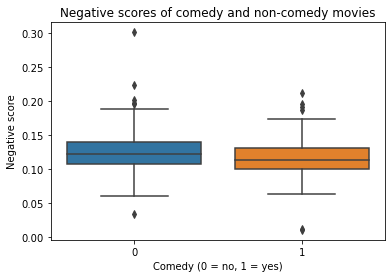

In [59]:
sns.boxplot(x = metadata['comedy'], y = final_sent_scores_df['neg']).set(title = 'Negative scores of comedy and non-comedy movies', xlabel = 'Comedy (0 = no, 1 = yes)', ylabel = 'Negative score')

[Text(0.5, 1.0, 'Positive scores of comedy and non-comedy movies'),
 Text(0.5, 0, 'Comedy (0 = no, 1 = yes)'),
 Text(0, 0.5, 'Positive score')]

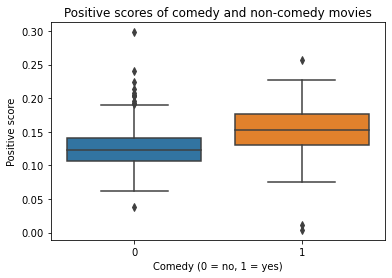

In [58]:
sns.boxplot(x = metadata['comedy'], y = final_sent_scores_df['pos']).set(title = 'Positive scores of comedy and non-comedy movies', xlabel = 'Comedy (0 = no, 1 = yes)', ylabel = 'Positive score')

### Process text and extract TF-IDF scores

In [12]:
def process_txt(txt, removed_list):
    tokens = nltk.word_tokenize(txt)
    modified_tokens = []
    for word in tokens:
        word = word.lower()
        if (word not in removed_list) :
            word = re.sub(r'[^a-z]','',word)
            if word != '':
                modified_tokens.append(word)
    return modified_tokens

In [13]:
all_tokens = [process_txt(txt, removed_list) for txt in all_txt]
all_counters = [Counter(token) for token in all_tokens]

In [14]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()
X = v.fit_transform(all_counters)

from sklearn.feature_extraction.text import TfidfTransformer
t = TfidfTransformer()
Z = t.fit_transform(X)

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

indices = range(len(metadata['title']))
#keep indices for future use
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(Z, metadata['comedy'], indices, test_size = 0.25, random_state = 1, stratify = metadata['comedy'])

### Train models

In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

def report_perf(model, X_data, y_data):
    y_pred = model.predict(X_data)
    try: 
        y_scores = model.predict_proba(X_data).T[1]
        
    except:
        y_scores = model.decision_function(X_data)
    print('Accuracy:', model.score(X_data,y_data))
    print('F1:', f1_score(y_data, y_pred))
    print('AUC:', roc_auc_score(y_data,y_scores))

Train a Logistic Regression model on TF-IDF scores

In [25]:
from sklearn.linear_model import LogisticRegression

start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(lr, X_test, y_test)

The training time is 1.9611716270446777 seconds
Accuracy: 0.7018633540372671
F1: 0.1111111111111111
AUC: 0.7836036036036036


Train a Logistic Regression model on sentiment scores

In [87]:
#get the same train_test_split as before
#final_sent_scores_df = pd.DataFrame(final_sent_scores)
X_train_sent_df = [final_sent_scores_df.iloc[i,:] for i in indices_train]
X_test_sent_df = [final_sent_scores_df.iloc[i,:] for i in indices_test]

In [88]:
start = time.time()
lr_sent = LogisticRegression()
lr_sent.fit(X_train_sent_df, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(lr_sent, X_test_sent_df, y_test)

The training time is 0.006567478179931641 seconds
Accuracy: 0.6894409937888198
F1: 0.0
AUC: 0.7315315315315315


Standardize sentiment scores

In [95]:
from scipy import stats
modified_X_train_sent_df = stats.zscore(X_train_sent_df)
modified_X_test_sent_df = stats.zscore(X_test_sent_df)

Train a Logistic Regression model on standardized sentiment scores

In [96]:
start = time.time()
lr_sent2 = LogisticRegression()
lr_sent2.fit(modified_X_train_sent_df, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(lr_sent2, modified_X_test_sent_df, y_test)

The training time is 0.003904581069946289 seconds
Accuracy: 0.7453416149068323
F1: 0.4533333333333334
AUC: 0.7232432432432433


Train a KNN model on TF-IDF scores

In [101]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
knn = KNeighborsClassifier(28)
knn.fit(X_train, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(knn, X_test, y_test)

The training time is 0.0026350021362304688 seconds
Accuracy: 0.7639751552795031
F1: 0.525
AUC: 0.7381081081081081


Train a KNN model on unmodified and standardized sentiment scores

In [102]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()
knn_sent = KNeighborsClassifier(25)
knn_sent.fit(X_train_sent_df, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(knn_sent, X_test_sent_df, y_test)

start = time.time()
knn_sent2 = KNeighborsClassifier(25)
knn_sent2.fit(modified_X_train_sent_df, y_train)
end = time.time()
print('The training time is', end-start, 'seconds')
report_perf(knn_sent2, modified_X_test_sent_df, y_test)

The training time is 0.0032334327697753906 seconds
Accuracy: 0.7577639751552795
F1: 0.5063291139240508
AUC: 0.7222522522522523
The training time is 0.000553131103515625 seconds
Accuracy: 0.7515527950310559
F1: 0.5238095238095238
AUC: 0.7249549549549549


Get coefficients of Logistic Regression models

In [27]:
term_list = v.feature_names_
coeffs = lr.coef_.tolist()[0]
Dol = {'term': term_list, 'coefficient': coeffs}
coeff_df = pd.DataFrame(Dol)
coeff_df.sort_values(by = 'coefficient').head(20)

,term,coefficient
36755,eyes,-0.623640
36850,face,-0.535098
30664,door,-0.433784
73301,night,-0.431947
97152,sheriff,-0.417718
7052,back,-0.396419
118928,voice,-0.365768
46572,gun,-0.364651
11207,blood,-0.364392
97351,ship,-0.364080


In [28]:
coeff_df.sort_values(by = 'coefficient', ascending = False).head(20)

,term,coefficient
64680,m,1.260208
75713,oh,1.049245
118835,vitti,0.943770
87826,re,0.852476
58079,juno,0.694292
124003,yeah,0.683581
87959,really,0.660389
120647,well,0.646143
59676,know,0.601278
28807,dignan,0.598950


In [29]:
coeff_df

,term,coefficient
0,a,-0.085930
1,aa,-0.035985
2,aaa,0.009095
3,aaaa,0.013396
4,aaaaa,0.004379
...,...,...
125258,zzzzzzam,-0.000709
125259,zzzzzzattt,0.000000
125260,zzzzzzt,-0.001872
125261,zzzzzzzp,-0.000727


In [104]:
coeffs = lr_sent2.coef_.tolist()[0]
Dol = {'term':['neg','neu','pos','compound'] , 'coefficient': coeffs}
coeff_df = pd.DataFrame(Dol)
coeff_df.sort_values(by = 'coefficient')

,term,coefficient
0,neg,-0.353698
1,neu,-0.290444
3,compound,0.179923
2,pos,0.506924
